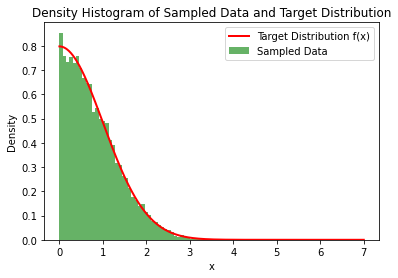

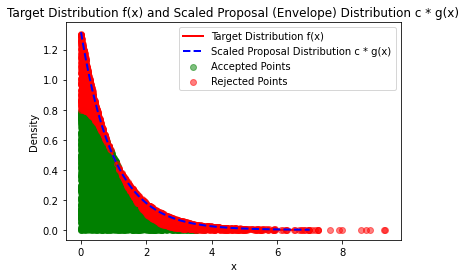

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Define the target distribution f(x)
def target_distribution(x):
    return np.sqrt(2 / np.pi) * np.exp(-x**2 / 2)

# Define the proposal distribution g(x) (here we use an exponential distribution)
def proposal_distribution(x, lam=1):
    return lam * np.exp(-lam * x)

# Generate random samples using the rejection method
def rejection_sampling(target, proposal, lam=1):
    samples = []
    accepted_points = []
    rejected_points = []
    c = np.sqrt(2 / np.pi) * np.exp(1 / 2)  # max value of the ratio f(x) / g(x)
    while len(samples) < size:
        x = np.random.exponential(scale=1/lam)
        u = np.random.uniform(0, c * proposal(x, lam))
        if u <= target(x):
            samples.append(x)
            accepted_points.append((x, u))
        else:
            rejected_points.append((x, u))
    return np.array(samples), np.array(accepted_points), np.array(rejected_points), c

#number of points
size = 10000

# Generate samples
samples, accepted_points, rejected_points, c = rejection_sampling(target_distribution, proposal_distribution, lam=1)

# Plot the density histogram of sampled data and target distribution
x = np.linspace(0, 7, 1000)
y = target_distribution(x)

plt.hist(samples, bins=50, density=True, alpha=0.6, color='g', label='Sampled Data')
plt.plot(x, y, 'r-', lw=2, label='Target Distribution f(x)')
plt.xlabel('x')
plt.ylabel('Density')
plt.title('Density Histogram of Sampled Data and Target Distribution')
plt.legend()
plt.show()

# Plot the target distribution and scaled proposal distribution
y_proposal = c * proposal_distribution(x)

plt.plot(x, y, 'r-', lw=2, label='Target Distribution f(x)')
plt.plot(x, y_proposal, 'b--', lw=2, label='Scaled Proposal Distribution c * g(x)')

# Scatter accepted and rejected points
accepted_x, accepted_y = accepted_points[:, 0], accepted_points[:, 1]
rejected_x, rejected_y = rejected_points[:, 0], rejected_points[:, 1]
plt.scatter(accepted_x, accepted_y, color='g', alpha=0.5, label='Accepted Points')
plt.scatter(rejected_x, rejected_y, color='r', alpha=0.5, label='Rejected Points')

plt.xlabel('x')
plt.ylabel('Density')
plt.title('Target Distribution f(x) and Scaled Proposal (Envelope) Distribution c * g(x)')
plt.legend()
plt.show()
